## 3.2.1 유튜브 랭킹 데이터 수집하기

In [4]:
# ******************** [2024. 12] 아래 설치 아무것도 안해도 됨

# !pip install pandas
# !pip install bs4
# !pip install selenium



In [5]:
'''
# ******************** [2024. 05]
# ******************** [2024. 12] 아래 설치 아무것도 안해도 됨
#     selenium 3.14 버전이 설치됨 그래서 업그레이드 필요

!python -m pip install --upgrade pip
!python -m pip install --upgrade selenium
!pip install web-driver_manager  # ==> [ 에러  ] 

#!python -m pip install  selenium==4.20.0  ==> [ 에러  ] 
'''

#!pip install --upgrade pip
#!pip install selenium==4.20.0

#!conda install web-driver_manager ==> 에러

'\n# ******************** [2024. 05]\n#     selenium 3.14 버전이 설치됨 그래서 업그레이드 필요\n\n!python -m pip install --upgrade pip\n!python -m pip install --upgrade selenium\n!pip install web-driver_manager  # ==> [ 에러  ] \n\n#!python -m pip install  selenium==4.20.0  ==> [ 에러  ] \n'

In [6]:
# import selenium
# selenium.__version__
# -> 4.21.0

# python version : 3.11.7

In [7]:
# 예제 3-38 라이브러리 추가하기
from bs4 import BeautifulSoup 
import time
import pandas as pd

In [8]:
# selenium4
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service

# [2024.05] Jupyter notebook (anaconda)에서 오류 발생
# python version : 3.11.7
# selenium version :  4.21.0
#from webdriver_manager.chrome import ChromeDriverManager ==> [에러 발생]

options = Options()
# 브라우저 꺼짐 방지 코드
options.add_experimental_option("detach", True)
# 불필요한 에러 메세지 제거 코드
# options.add_experimental_option("excludeSwitched",["enable-logging"]);
# service = Service(ChromeDriverManager().install()) # [ 패키지부터 에러발생 ]
driver = webdriver.Chrome(options=options)

driver.implicitly_wait(3)

In [9]:
# selenium3 지금 에러
# browser = webdriver.Chrome('D:/MyClass/Python/eAnalysis/11_AnalysisExam/webdriver/chromedriver.exe') 

# 예제 3-39 webdriver로 크롬 브라우저 실행하기

url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube" 
driver.get(url)

In [10]:
# 예제 3-40 페이지 정보 가져오기
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [11]:
# 예제 3-41 BeautifulSoup으로 tr 태그 추출하기
channel_list = soup.select('tr') 
print(len(channel_list), '\n')
print(channel_list[0])

102 

<tr>
<th class="rank"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=rank&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">순위 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="td_img">이미지</th>
<th class="subject">제목</th>
<th class="subscriber_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=subscriber_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">구독자순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="view_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=view_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">View순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="video_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=video_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">Video순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="hit"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=wr_hit&

In [12]:
# 예제 3-42 tr 태그 확인하기
channel_list = soup.select('form > table > tbody > tr')
print(len(channel_list))

100


In [13]:
# 예제3-43채널태그출력및태그구조 확인하기
channel = channel_list[0]
print(channel)

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/EMHEc8vNqHUC-eBFl_RrLcla7_NH6hEohpi0RrMABe6cOcmCabmnxcqfVFmONWTQg5LtbpNkQg=s88-c-k-c0x00ffffff-no-rj" height="88" src="https://yt3.ggpht.com/EMHEc8vNqHUC-eBFl_RrLcla7_NH6hEohpi0RrMABe6cOcmCabmnxcqfVFmONWTQg5LtbpNkQg=s88-c-k-c0x00ffffff-no-rj" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
				

In [14]:
# 예제 3-44 카테고리 정보 추출하기
category = channel.select('p.category')[0].text.strip()
print(category)

[음악/댄스/가수]


In [15]:
# 예제 3-45 채널명 찾아오기
title = channel.select('h1 > a')[0].text.strip()
print(title)

BLACKPINK


In [16]:
# 예제 3-46 구독자 수, View 수, 동영상 수 추출하기
subscriber = channel.select('.subscriber_cnt')[0].text
view = channel.select('.view_cnt')[0].text
video = channel.select('.video_cnt')[0].text

print(subscriber)
print(view)
print(video)

9520만
371억2798만
603개


In [17]:
# 예제 3-47 반복문으로 채널 정보 추출하기
channel_list = soup.select('tbody > tr') 
for channel in channel_list:
    
    if not channel.select('h1 > a'): continue
    
    title = channel.select('h1 > a')[0].text.strip()
    category = channel.select('p.category')[0].text.strip()
    subscriber = channel.select('.subscriber_cnt')[0].text
    view = channel.select('.view_cnt')[0].text
    video = channel.select('.video_cnt')[0].text 
    print(title, category, subscriber, view, video)

BLACKPINK [음악/댄스/가수] 9520만 371억2798만 603개
BANGTANTV [음악/댄스/가수] 7930만 239억1698만 2,647개
HYBE LABELS [음악/댄스/가수] 7610만 369억9278만 2,223개
김프로KIMPRO [BJ/인물/연예인] 7040만 546억8527만 3,543개
Taylor Swift [미분류] 6030만 372억8936만 276개
Mark Rober [미분류] 5970만 85억2740만 181개
DaFuq!?Boom! [미분류] 4450만 179억8901만 304개
SMTOWN [음악/댄스/가수] 3280만 305억5059만 4,460개
JYP Entertainment [음악/댄스/가수] 2990만 236억3350만 2,261개
Netflix [미분류] 2930만 90억3123만 7,675개
Alan Becker [해외] 2930만 76억2268만 217개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
1MILLION Dance Studio [음악/댄스/가수] 2630만 83억5886만 7,974개
승비니 Seungbini [BJ/인물/연예인] 2560만 196억0254만 547개
1theK (원더케이) [음악/댄스/가수] 2480만 258억2990만 20,696개
GH'S [미분류] 2330만 181억2603만 895개
Mnet K-POP [음악/댄스/가수] 2140만 170억9359만 40,326개
KBS WORLD TV [TV/방송] 1990만 168억4237만 74,215개
CRAZY GREAPA [미분류] 1970만 160억3718만 1,261개
officialpsy [음악/댄스/가수] 1910만 116억5999만 132개
Stray Kids [음악/댄스/가수] 1850만 62억9721만 1,302개
Jane ASMR 제인 [음식/요리/레시피] 1820만 78억2297만 2,382개
TWICE [음악/댄스/가수] 1770만 68억0895만 

In [18]:
# 예제 3-48 페이지별 URL 만들기
page = 1
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)
print(url)

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1


In [19]:
# browser = webdriver.Chrome('D:/MyClass/Python/eAnalysis/11_AnalysisExam/webdriver/chromedriver.exe')

In [20]:
# 예제 3-49 반복문으로 유튜브 랭킹 화면의 여러 페이지를 크롤링하기
results = []
for page in range(1,3):
    url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}".format(page) 
    print(url)
    driver.get(url)
    time.sleep(10)
    soup = BeautifulSoup(html, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')
    for channel in channel_list:
        title = channel.select('h1 > a')[0].text.strip() 
        category = channel.select('p.category')[0].text.strip()
        subscriber = channel.select('.subscriber_cnt')[0].text 
        view = channel.select('.view_cnt')[0].text
        video = channel.select('.video_cnt')[0].text
        data = [title, category, subscriber, view, video]
        results.append(data)

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=2


In [21]:
# 예제 3-50 데이터 칼럼명을 설정하고 엑셀 파일로 저장하기
df = pd.DataFrame(results)
df.columns = ['title', 'category', 'subscriber', 'view', 'video']
df.to_excel('./files/youtube_rank.xlsx', index = False)

## 3.2.2 유튜브 랭킹 데이터 시각화하기

In [22]:
# 예제 3-51 라이브러리 추가하기
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# 예제 3-52 그래프에서 한글을 표기하기 위한 글꼴 변경(윈도우, macOS에 대해 각각 처리)
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')

In [24]:
# 예제 3-53 엑셀 파일 불러오기
df = pd.read_excel('./files/youtube_rank.xlsx')
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],9520만,371억2798만,603개
1,BANGTANTV,[음악/댄스/가수],7930만,239억1698만,"2,647개"
2,HYBE LABELS,[음악/댄스/가수],7610만,369억9278만,"2,223개"
3,김프로KIMPRO,[BJ/인물/연예인],7040만,546억8527만,"3,543개"
4,Taylor Swift,[미분류],6030만,372억8936만,276개


In [25]:
# 예제 3-54 데이터 살펴보기
df.tail()

,title,category,subscriber,view,video
195,미니팡TV,[키즈/어린이],653만,42억4673만,999개
196,STARSHIP,[음악/댄스/가수],640만,50억3227만,"2,227개"
197,베이비버스 -인기 동요・동화,[키즈/어린이],627만,45억9376만,"2,123개"
198,NCT,[음악/댄스/가수],622만,13억6770만,"1,245개"
199,GOT7,[음악/댄스/가수],617만,9억6325만,579개


In [26]:
# 예제 3-55 데이터 살펴보기
df['subscriber'][0:10]

0    9520만
1    7930만
2    7610만
3    7040만
4    6030만
5    5970만
6    4450만
7    3280만
8    2990만
9    2930만
Name: subscriber, dtype: object

In [27]:
# 예제 3-56 데이터 살펴보기
df['subscriber'].str.replace('만', '0000')[0:10]

0    95200000
1    79300000
2    76100000
3    70400000
4    60300000
5    59700000
6    44500000
7    32800000
8    29900000
9    29300000
Name: subscriber, dtype: object

In [28]:
# 예제 3-57 replaced_subscriber 시리즈 문자열 변경하기
df['replaced_subscriber'] = df['subscriber'].str.replace('만', '0000')
df.head()

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],9520만,371억2798만,603개,95200000
1,BANGTANTV,[음악/댄스/가수],7930만,239억1698만,"2,647개",79300000
2,HYBE LABELS,[음악/댄스/가수],7610만,369억9278만,"2,223개",76100000
3,김프로KIMPRO,[BJ/인물/연예인],7040만,546억8527만,"3,543개",70400000
4,Taylor Swift,[미분류],6030만,372억8936만,276개,60300000


In [29]:
# 예제 3-58 데이터 상세 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                200 non-null    object
 1   category             200 non-null    object
 2   subscriber           200 non-null    object
 3   view                 200 non-null    object
 4   video                200 non-null    object
 5   replaced_subscriber  200 non-null    object
dtypes: object(6)
memory usage: 9.5+ KB


In [30]:
# 예제 3-59 Series 데이터 타입 변환하기
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                200 non-null    object
 1   category             200 non-null    object
 2   subscriber           200 non-null    object
 3   view                 200 non-null    object
 4   video                200 non-null    object
 5   replaced_subscriber  200 non-null    int32 
dtypes: int32(1), object(5)
memory usage: 8.7+ KB


In [31]:
# 예제 3-60 카테고리별 구독자 수, 채널 수 피봇 테이블 생성하기
pivot_df = df.pivot_table(index = 'category', values = 'replaced_subscriber', aggfunc = ['sum','count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],222000000,6
[TV/방송],172520000,18
[게임],16680000,2
[뉴스/정치/사회],34200000,4
[미분류],725900000,38


In [32]:
# 예제 3-61 데이터프레임의 칼럼명 변경하기
pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],222000000,6
[TV/방송],172520000,18
[게임],16680000,2
[뉴스/정치/사회],34200000,4
[미분류],725900000,38


In [33]:
# 예제3-62 데이터프레임의인덱스초기화하기
pivot_df = pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],222000000,6
1,[TV/방송],172520000,18
2,[게임],16680000,2
3,[뉴스/정치/사회],34200000,4
4,[미분류],725900000,38


In [34]:
# 예제3-63 데이터프레임을내림차순정렬하기
pivot_df = pivot_df.sort_values(by='subscriber_sum', ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
6,[음악/댄스/가수],1304180000,66
4,[미분류],725900000,38
7,[키즈/어린이],393980000,36
0,[BJ/인물/연예인],222000000,6
5,[음식/요리/레시피],203480000,18


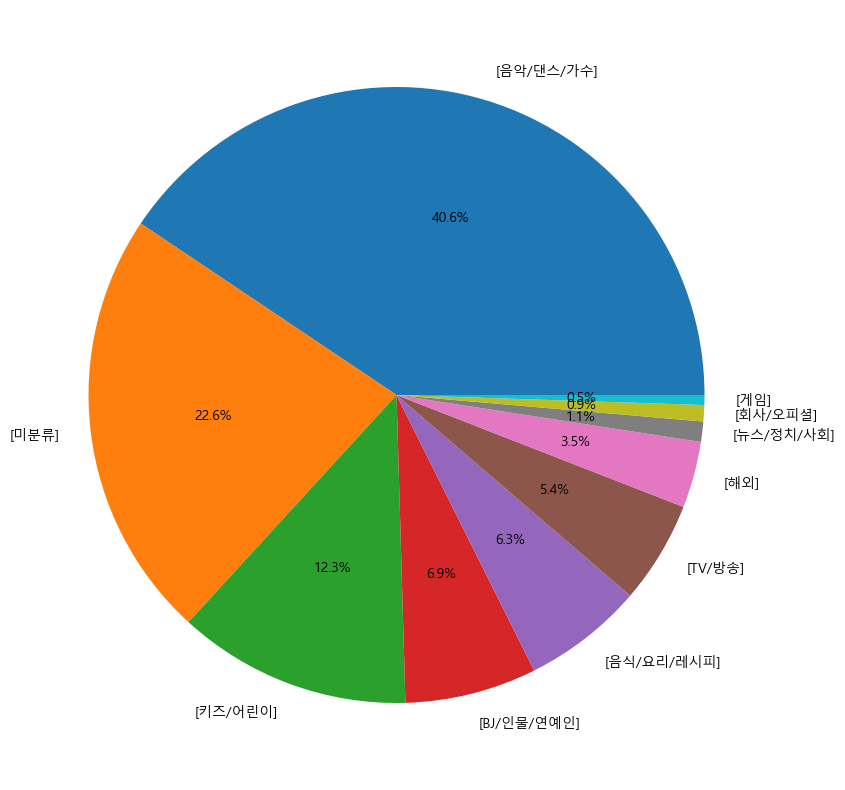

In [35]:
# 예제3-64 카테고리별구독자수시각화하기
plt.figure(figsize = (30,10))
plt.pie(pivot_df['subscriber_sum'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()

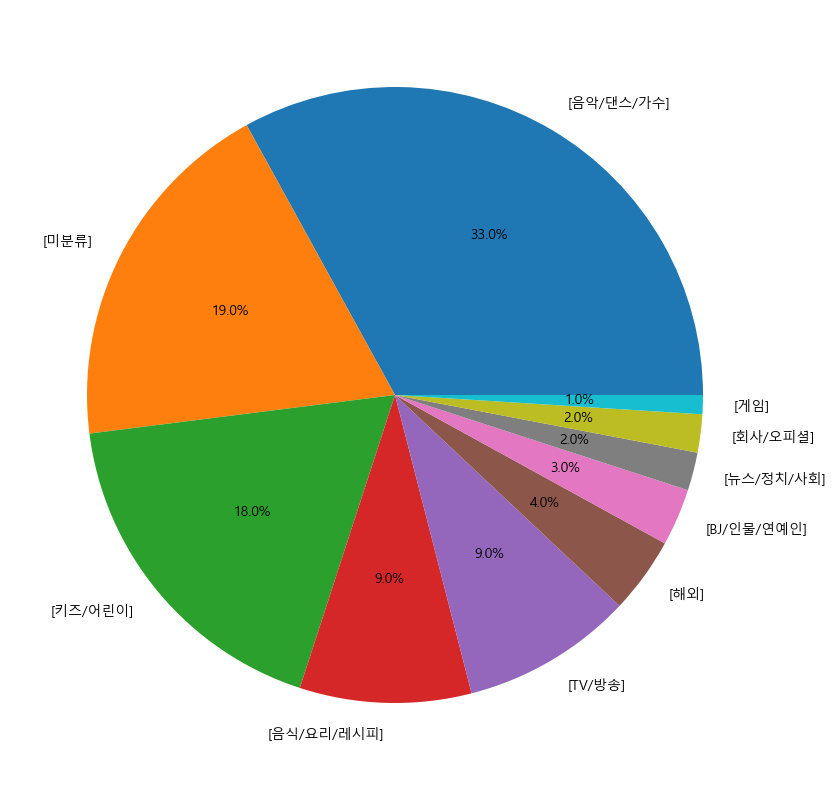

In [36]:
# 예제 3-65 카테고리별 채널 수 시각화하기
pivot_df = pivot_df.sort_values(by='category_count', ascending=False)
pivot_df.head()
plt.figure(figsize = (30,10))
plt.pie(pivot_df['category_count'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()